# Avant de run le code, il est nécessaire d'installer deeplake avec "pip install deeplake" via le terminal de commande.
Cette librairie nous permet d'utiliser une base de données EMNIST, constituée de caractères de toute sorte.

In [1]:
import numpy
import tensorflow
import matplotlib.pyplot
import deeplake
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.models import Sequential
SGD = tensorflow.keras.optimizers.SGD

In [2]:
ds_train = deeplake.load("hub://activeloop/emnist-byclass-train")
ds_test = deeplake.load("hub://activeloop/emnist-byclass-test")

hub://activeloop/emnist-byclass-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/emnist-byclass-train
hub://activeloop/emnist-byclass-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/emnist-byclass-test


In [3]:
X_train=ds_train.images
Y_train=ds_train.labels
print(X_train.shape)
print("Les dimensions d'une image de la base de données sont : ", X_train[2].shape)
print("Le nombre d'images dans la base de données est : ", len(X_train))

(697932, 28, 28)
Les dimensions d'une image de la base de données sont :  (28, 28)
Le nombre d'images dans la base de données est :  697932


In [4]:
X_test=ds_test.images
Y_test=ds_test.labels

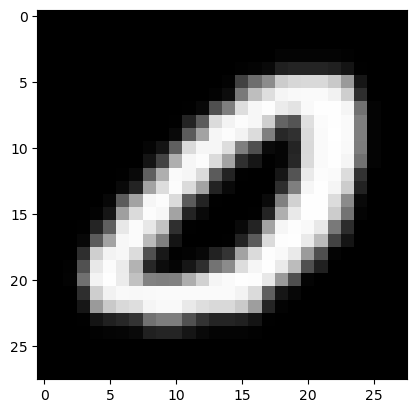

In [46]:
matplotlib.pyplot.imshow(X_test[2].numpy(), cmap=matplotlib.pyplot.cm.gray)

Voici la représentation numpy de la 5e image du dataset d'entrainement [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   32  82 127 127 127 127 170 138  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  46 125 141
  243 252 254 254 253 250 245 202  20   0]
 [  0   0   0   0   0   0   0   0   0   0   4  21  82 129 204 246 254 251
  222 215 140 127 114  39  32   4   

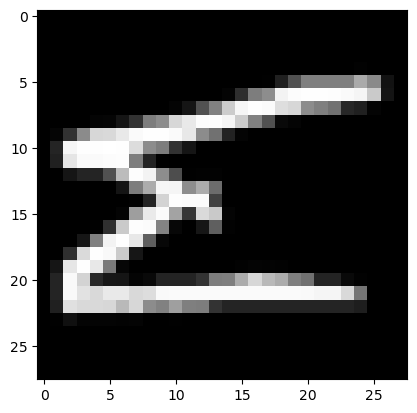

In [51]:
image_arr = X_train[4]
print("Voici la représentation numpy de la 5e image du dataset d'entrainement", image_arr.numpy())

matplotlib.pyplot.imshow(image_arr, cmap=matplotlib.pyplot.cm.gray)

Transforme les matrices 28x28 en vecteur de 784 lignes (cellule longue à charger)

In [13]:
X_train=X_train.numpy()
X_train=X_train.reshape(X_train.shape[0],784)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [14]:
X_test=X_test.numpy()
X_test=X_test.reshape(X_test.shape[0],784)

In [15]:
X_train.shape

(697932, 784)

In [16]:
X_test.shape

(116323, 784)

Normalise les vecteurs

In [26]:
X_train =(X_train.astype('int32')-127.5)/127.5
X_test  = (X_test.astype('int32')-127.5)/127.5

In [42]:
dimension_entree = 784
nbneurones1 = 250
nbneurones2 = 128
nbneurones3 = 62
nbneurones4 = 10
epoch = 50
batchsize = 250
taux_apprentissage = 0.01

In [43]:
#Modèle de réseau de neurones avec 3 couches
model = Sequential()

model.add(Dense(nbneurones1, input_shape=(dimension_entree,)))  
model.add(Activation('sigmoid'))
model.add(Dense(nbneurones2))
model.add(Activation('sigmoid'))
model.add(Dense(nbneurones3))
model.add(Activation('sigmoid'))
model.add(Dense(nbneurones4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 250)               196250    
_________________________________________________________________
activation_15 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32128     
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 62)                7998      
_________________________________________________________________
activation_17 (Activation)   (None, 62)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [44]:
# Définition des hyperparamètres de l'entraînement
sgd = SGD(lr=taux_apprentissage)

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy']  
)

In [45]:
# Entraînement
model_train = model.fit(
    X_train, 
    Y_train,
    batch_size=batchsize,
    epochs=epoch,
    validation_data=(X_test, Y_test),
    verbose=2
)

MemoryError: Unable to allocate 2.04 GiB for an array with shape (697932, 784) and data type float32

## La cellule suivante doit être run une seule et unique fois !!

In [ ]:
# Test
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=128)

In [ ]:
#On affiche les résultats

#Courbe de loss

epochs = range(1, epoch+1)

loss_train = model_train.history["loss"]
accuracy_train = model_train.history["accuracy"]

loss_test = model_train.history["val_loss"]
accuracy_test = model_train.history["val_accuracy"]

#Courbe de loss
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(epochs, loss_train, 'r+', label="Fonction de coût de l'entraînement")
matplotlib.pyplot.plot(epochs, loss_test, 'b+', label="Fonction de coût de test")
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel("epochs")
matplotlib.pyplot.title("Fonction de coût")
matplotlib.pyplot.show()

#Courbe d'accuracy (métrique qui permet de valider le modèle)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(epochs, accuracy_train, 'r+', label="Accuracy de l'entraînement")
matplotlib.pyplot.plot(epochs, accuracy_test, 'b+', label="Accuracy de test")
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel("epochs")
matplotlib.pyplot.title("Accuracy")
matplotlib.pyplot.show()